In [1]:
%cd ..

/home/hien/Documents/models/reid/rep_reid


# Torchvison

In [2]:
import torch
import matplotlib.pyplot as plt

from src.data.transforms import Denormalize


NORM_MEAN = [0.485, 0.456, 0.406]
NORM_STD = [0.229, 0.224, 0.225]

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(image)
    plt.show()


def tensor_to_np(
    img,
    de_normalize: bool = False,
    mean=NORM_MEAN,
    std=NORM_STD,
):
    if de_normalize:
        img = Denormalize(mean=mean, std=std)(img)
    img = (img * 255.0).type(torch.IntTensor).clamp(min=0, max=255)
    return img.permute(1, 2, 0)


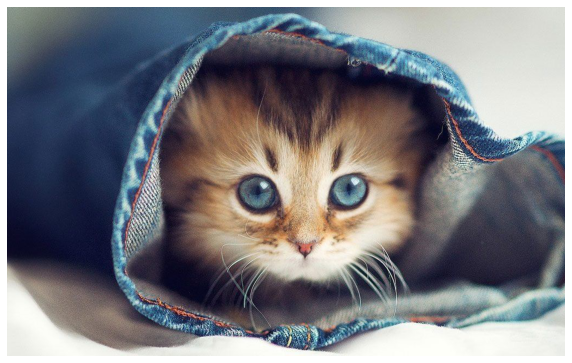

In [3]:
from src.utils import imread

image_path = "notebooks/Avatar1.jpg"

image_origin = imread(image_path, lib="pillow")

visualize(image_origin)

## Random erasing


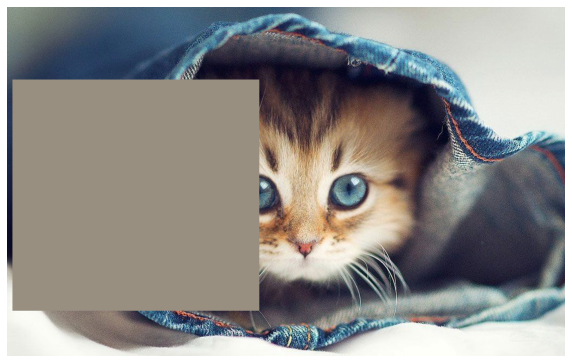

In [4]:
import torchvision.transforms as T

from src.data.transforms import RandomErasing

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(NORM_MEAN, NORM_STD),
        RandomErasing(probability=1),
    ]
)

transformed = transform(image_origin)

visualize(tensor_to_np(transformed, de_normalize=True))


## Local Grayscale Transfomation

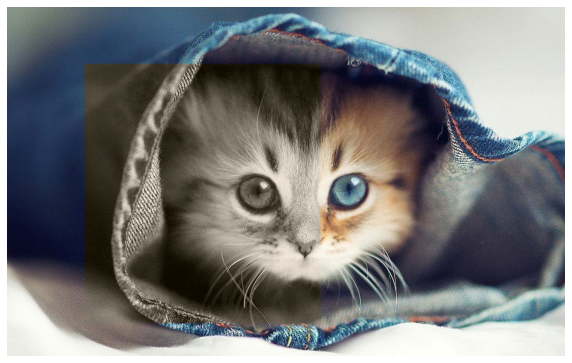

In [5]:
import torchvision.transforms as T

from src.data.transforms import LGT

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(NORM_MEAN, NORM_STD),
        LGT(probability=1),
    ]
)

transformed = transform(image_origin)

visualize(tensor_to_np(transformed, de_normalize=True))

## Cutout

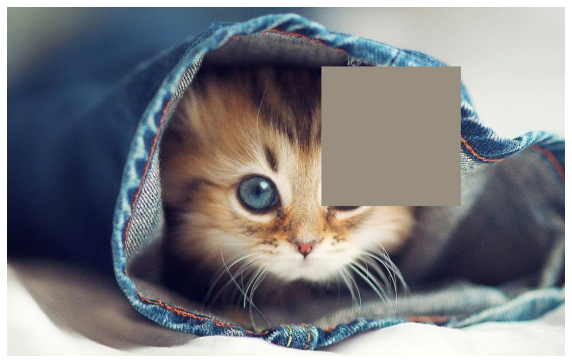

In [6]:
import torchvision.transforms as T

from src.data.transforms import Cutout

transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(NORM_MEAN, NORM_STD),
        Cutout(probability=1, size=256),
    ]
)

transformed = transform(image_origin)

visualize(tensor_to_np(transformed, de_normalize=True))

## Random 2d translate

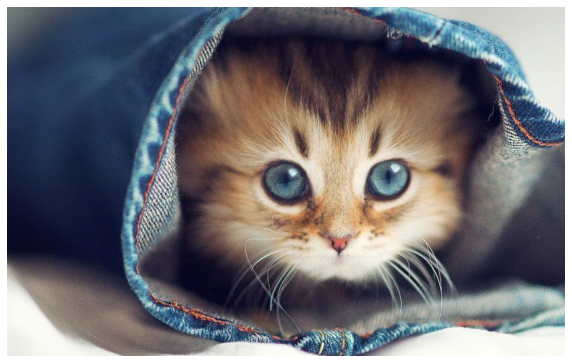

In [12]:
import torchvision.transforms as T

from src.data.transforms import Random2DTranslation

transform = T.Compose(
    [
        Random2DTranslation(p=1, height=image_origin.size[1], width=image_origin.size[0]),
        T.ToTensor(),
        T.Normalize(NORM_MEAN, NORM_STD),
    ]
)

transformed = transform(image_origin)

visualize(tensor_to_np(transformed, de_normalize=True))


## Auto augmentation

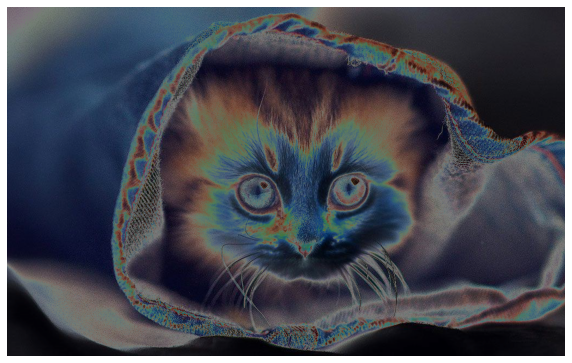

In [30]:
import torchvision.transforms as T

from src.data.transforms import AutoAugment

transform = T.Compose(
    [
        T.RandomApply([AutoAugment()], p=1),
        T.ToTensor(),
        T.Normalize(NORM_MEAN, NORM_STD),
    ]
)

transformed = transform(image_origin)

visualize(tensor_to_np(transformed, de_normalize=True))


# Albumentation

In [8]:
import cv2
import random
import albumentations as A
from matplotlib import pyplot as plt
from albumentations.pytorch import ToTensorV2

from data.transforms import RandomErasing


In [31]:
import torch
import matplotlib.pyplot as plt

from src.data.transforms import Denormalize


NORM_MEAN = [0.485, 0.456, 0.406]
NORM_STD = [0.229, 0.224, 0.225]

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(image)
    plt.show()


def tensor_to_np(
    img,
    de_normalize: bool = False,
    mean=NORM_MEAN,
    std=NORM_STD,
):
    if de_normalize:
        img = Denormalize(mean=mean, std=std)(img)
    img = (img * 255.0).type(torch.IntTensor).clamp(min=0, max=255)
    return img.permute(1, 2, 0)


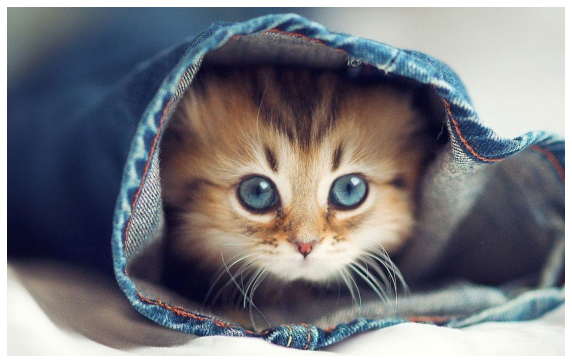

In [34]:
from src.utils import imread

image_path = "notebooks/Avatar1.jpg"

image_origin = imread(image_path, lib="cv2")

visualize(image_origin)

## Rotate

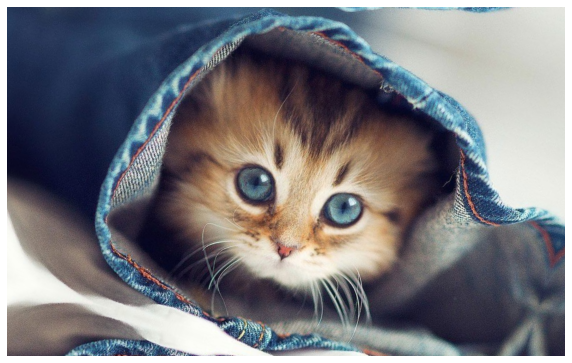

In [35]:
transform = A.Compose([A.Rotate(limit=45, always_apply=True)])

transformed = transform(image=image_origin)

visualize(transformed["image"])


## Equalize

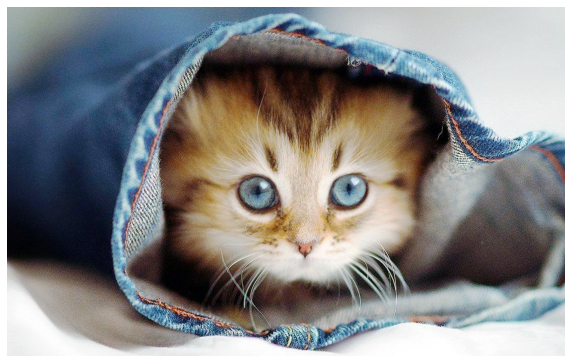

In [36]:
transform = A.Compose([
    A.Equalize(mode='cv', p=0.8, always_apply=True)
    ])

transformed = transform(image=image_origin)

visualize(transformed['image'])

## CLAHE

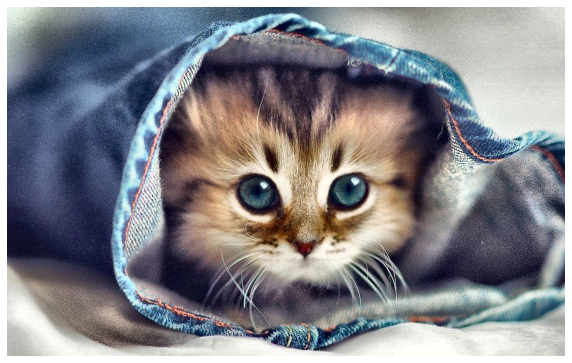

In [37]:
transform = A.Compose([
    A.CLAHE(p=0.8, always_apply=True)
    ])

transformed = transform(image=image_origin)

visualize(transformed['image'])

## CoarseDropout

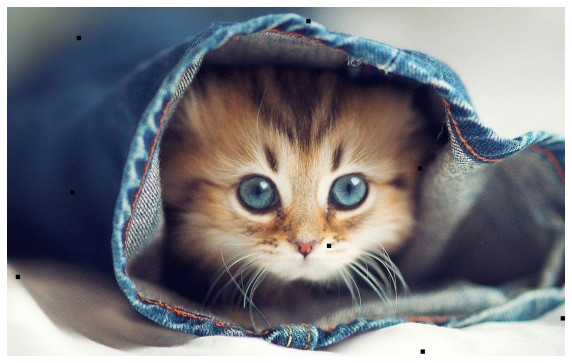

In [40]:
transform = A.Compose([A.CoarseDropout(max_holes=8, always_apply=True)])

transformed = transform(image=image_origin)

visualize(transformed["image"])
